# Метрики приложения

**Описание проекта:**

Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.


Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.


Вам предстоит изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

**Цель исследования:**

1. Выяснить, откуда приходят пользователи и какими устройствами они пользуются.
2. Выяснить, сколько стоит привлечение пользователей из различных рекламных каналов.
3. Определить, сколько денег приносит каждый клиент.
4. Определить, когда расходы на привлечение клиента окупаются.
5. Выяснить, какие факторы мешают привлечению клиентов.
6. Разобраться в причинах, по которым компания терпит убытки, и помочь ей выйти в плюс.

**Ход исследования:**

Данные о посещениях сайта я получу из файла ```/datasets/visits_info_short.csv```, данные о заказах клиентов - ```/datasets/orders_info_short.csv```, данные о расходах на рекламу - ```/datasets/costs_info_short.csv```. О качестве данных ничего не известно, поэтому понадобится обзор данных.

На этапе ознакомления с данными мне необходимо убедиться в качестве полученных данных. При наличие пропусков в данных я их обработать. Мне необходимо проверить данные на дубликаты, при наличии я их обработаю.

После обработки данных необходимо задать функции для вычисления значений метрик (LTV, ROI, Retention Rate, Conversion Rate, etc.) и построения графиков полученных метрик.

На этапе исследовательского анализа данных я составлю профили пользователей из разных стран, из разных рекламных источников и с разных устройств. Необходимо провести следующие действия:

- Определить минимальную и максимальную даты привлечения пользователей.
- Выяснить страны, из которых пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.
- Узнать, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.
- Изучить рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей.

На основе полученных результатов я проведу анализ бизнес-показателей. Необходимо посчитать общие траты компании на рекламу и выяснить, какие пользователи являются самыми прибыльными для компании. Я проведу оценку окупаемости рекламы с помощью графиков показателей.

В конце проекта необходимо сформулировать общий вывод по всей проделанной работе.

Таким образом, моё исследование пройдет в 6 этапов:

- Изучение исходных данных + предобработка данных
- Введение функций для расчета и анализа бизнес-показателей
- Проведение исследовательского анализа данных
- Анализ маркетинговых метрик
- Оценка окупаемости рекламы
- Написание общего вывода

### Загрузите данные и подготовьте их к анализу

#### Импорт библиотек и создание датафреймов с данными из файлов

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import warnings
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')

In [2]:
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
except:
    visits = pd.read_csv('visits_info_short.csv')

try:
    orders = pd.read_csv('/datasets/orders_info_short.csv')
except:
    orders = pd.read_csv('orders_info_short.csv')

try:
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except:
    costs = pd.read_csv('costs_info_short.csv')

#### Изучение полученных данных + Предобработка данных

***Изучение данных о визитах пользователей:***

In [3]:
print(display(visits.head())) # предварительный просмотр

print(visits.info()) # вывод информации о датафрейме

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None


In [4]:
visits.columns=['user_id', 'region', 'device', 'channel', 'session_start', 'session_end'] # переименование столбцов

# изменение типа столбцов с датой
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [5]:
visits.duplicated().sum() # проверка дубликатов

0

In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


В датафрейме ```visits``` были обнаружены:

1. Неверный формат названий столбцов
2. Неверный тип данных в столбцах с датой

Все столбцы переименованы, столбцы ```session_start``` и ```session_end``` приведены к типу *datetime*

***Изучение данных о заказах:***

In [7]:
print(display(orders.head()))
print(orders.info())
print(orders.describe())

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None
            User Id       Revenue
count  4.021200e+04  40212.000000
mean   4.990295e+11      5.370608
std    2.860937e+11      3.454208
min    5.993260e+05      4.990000
25%    2.511324e+11      4.990000
50%    4.982840e+11      4.990000
75%    7.433327e+11      4.990000
max    9.998954e+11     49.990000


In [8]:
orders.columns=['user_id', 'event_dt', 'revenue'] # переименование столбцов

# изменение типа столбца с датой
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [9]:
orders.duplicated().sum() # проверка дубликатов

0

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


В датафрейме ```orders``` были обнаружены:

1. Неверный формат названий столбцов
2. Неверный тип данных в столбце с датой

Все столбцы переименованы, столбец ```event_dt``` приведен к типу *datetime*

***Изучение данных о расходах на рекламу:***

In [11]:
print(display(costs.head()))
print(costs.info())
print(costs.describe())

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None
             costs
count  1800.000000
mean     58.609611
std     107.740223
min       0.800000
25%       6.495000
50%      12.285000
75%      33.600000
max     630.000000


In [12]:
costs.columns = costs.columns.str.lower() # приведение названий столбцов к нижнему регистру

# изменение типа столбца с датой
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

costs = costs.rename(columns={'dt': 'event_dt'})

In [13]:
costs.duplicated().sum() # проверка дубликатов

0

In [14]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   event_dt  1800 non-null   object 
 1   channel   1800 non-null   object 
 2   costs     1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


В датафрейме ```costs``` были обнаружены:

1. Неверный формат названий столбцов
2. Неверный тип данных в столбце с датой

Все столбцы преобразованы, столбец ```dt``` приведен к типу *datetime*

#### Вывод:

При изучении данных из файла были обнаружены и устранены несоответствия в названиях столбцов (приведены к змеиному регистру) и изменены типы данных в столбах с датой (тип изменен на datetime). Дубликатов, аномалий и пропусков в датасете не обнаружено.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

***Запишем функцию для расчета профилей пользователей:***

In [15]:
def get_profiles(sessions, orders, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    # for event in event_names:
    #     if event in events['event_name'].unique():
    #         profiles[event] = profiles['user_id'].isin(
    #             events.query('event_name == @event')['user_id'].unique()
    #         )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    ad_costs = ad_costs.rename(columns={'event_dt': 'dt'})
    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

***Запишем функции для подсчета Retention Rate и конверсии:***

In [16]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [17]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

***Запишем функцию для подсчета LTV:***

In [18]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

***Запишем функцию для сглаживания данных:***

In [19]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

***Запишем функции для построения графика Retention Rate, графика конверсии и для визуализации LTV и ROI:***

In [20]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [21]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [22]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### Вывод

На этом этапе были написаны все необходимые функции, которые впоследствии помогут правильно провести наше исследование, посчитать различного рода показатели и визуализировать полученные результаты.

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Составление профилей пользователей

In [23]:
profiles = get_profiles(visits, orders, costs)
profiles # вывод датафрейма с профилями пользователей

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


In [24]:
# Определим минимальную и максимальную дату привлечения

min_date = profiles['dt'].min() # минимальная дата 
max_date = profiles['dt'].max() # максимальная дата 

print('Минимальная дата привлечения:', min_date)
print('Максимальная дата привлечения:', max_date)

Минимальная дата привлечения: 2019-05-01
Максимальная дата привлечения: 2019-10-27


**Вывод:**

На этом этапе был составлен датафрейм, который содержит информацию о всех пользователях (профили пользователей).


Определены даты привлечения: 
- Минимальная дата привлечения: ***2019-05-01***
- Максимальная дата привлечения: ***2019-10-27***


Важно отметить, что максимальная дата привлечения, найденная на этом этапе, различается с максимальной датой привлечения для анализа, так как во втором случае учитывается горизонт анализа, но об этом будет отмечено на следующих этапах.

#### Распределение пользователей по странам

In [51]:
def get_payer_info(df, dimensions, ascending = 'users'):
    result = (df
            .groupby(dimensions)
            .agg(users = ('user_id', 'nunique'),
                 payers = ('payer', 'sum'),
                 payers_share = ('payer', 'mean'))
            .sort_values(by = ascending, ascending = False)
            .reset_index()
            .style.format({'payers': '{:.0f}', 'payers_share': '{:.2%}'})
           )
    return result

get_payer_info(profiles, 'region')

,region,users,payers,payers_share
0,United States,61829,6108,9.88%
1,UK,11154,569,5.10%
2,France,11058,554,5.01%
3,Germany,9528,490,5.14%


**Вывод:**

В приложение приходят пользователи из Франции, Германии, Великобритании и США. Страна, на которую приходится больше всего платящих пользователей - США (примерно 10% пользователей из этой страны совершают оплату в приложении).

#### Распределение пользователей по устройствам

In [57]:
get_payer_info(profiles, 'device')

,device,users,payers,payers_share
0,iPhone,33882,2972,8.77%
1,Android,21841,1782,8.16%
2,PC,19153,1294,6.76%
3,Mac,18693,1673,8.95%


**Вывод:**

Клиенты используют 4 устройства:
- Android
- Mac
- PC
- iPhone

Платящие пользователи больше всего предпочитают Mac для использования в приложении.

#### Распределение пользователей по каналам

In [58]:
get_payer_info(profiles, 'channel')

,channel,users,payers,payers_share
0,FaceBoom,29144,3557,12.20%
1,TipTop,19561,1878,9.60%
2,OppleCreativeMedia,8605,233,2.71%
3,LeapBob,8553,262,3.06%
4,WahooNetBanner,8553,453,5.30%
5,RocketSuperAds,4448,352,7.91%
6,MediaTornado,4364,156,3.57%
7,YRabbit,4312,165,3.83%
8,AdNonSense,3880,440,11.34%
9,lambdaMediaAds,2149,225,10.47%


**Вывод:**

По таблице мы можем понять, что наибольший процент платящих пользователей у тех, кто был привлечен из канала FaceBoom, однако важно заметить, что с FaceBoom пришли 29144 клиента. Клиенты, которые пришли с канала AdNonSense, имеют практически равный показатель платящих пользователей, однако количество пользователей в 7-8 раз меньше, чем количество пользователей, пришедших с FaceBoom.

#### Вывод:

На этом этапе были составлены профили пользователей из разных регионов. Были обнаружены регионы, устройства, каналы, где процент клиентов, которые платят в приложении, наибольший.

Небольшое ревью:

Для регионов:

- Наибольший показатель - у пользователей из США

Для устройств:

- Наибольший показатель - у пользователей, которые используют приложение на Mac

Для каналов:

- Наибольший показатель - у пользователей, привлеченных с каналов FaceBoom и AdNonSense.

Теперь мы знаем, какие клиенты приносят прибыль. Нужно подсчитать сумму расходов компании, найти стоимость привлечения одного пользователя для каждого источника, на графиках отследить динамику изменения расходов по каждому источнику. Этим и следует заняться на следующем этапе исследования.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Нахождение общей суммы расходов на маркетинг

In [30]:
profiles['acquisition_cost'].sum()

105497.29999999999

**Вывод:**

Мы выяснили, что общая сумма денежных средств, направленных на привлечение всех пользователей, составляет 105497.3 денежных ед.

#### Нахождение затрат компании на каждый источник

In [31]:
channel_costs = profiles.pivot_table(index='channel', values='acquisition_cost', aggfunc='sum').sort_values(by='acquisition_cost', ascending=False)
channel_costs

,acquisition_cost
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


**Вывод:**

На основе полученных данных можно отметить, что больше всего компания потратила денежных средств на привлечение пользователей из TipTop и FaceBoom. На эти два источника приходится более 80% всех затрат компании.

#### Динамика изменения расходов по каждому источнику

In [32]:
costs['week'] = pd.to_datetime(costs['event_dt']).dt.isocalendar().week
costs['month'] = pd.to_datetime(costs['event_dt']).dt.month

Text(0, 0.5, 'Cумма расходов на маркетинг')

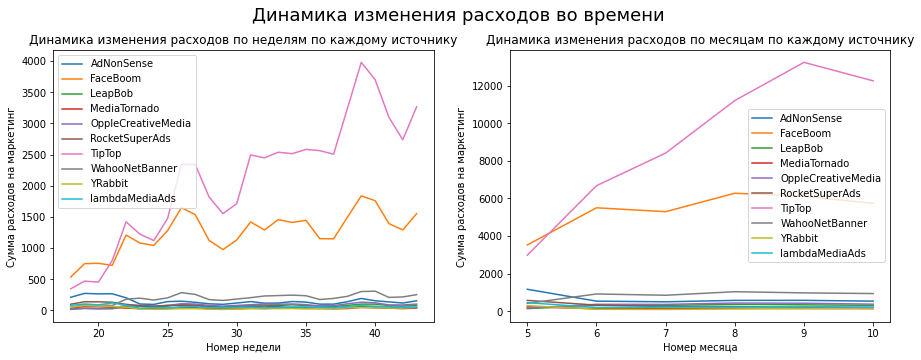

In [33]:
costs_by_week = costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum')
costs_by_month = costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')

graph, (first, second) = plt.subplots(1, 2, figsize=(15,5))
graph.suptitle('Динамика изменения расходов во времени', y = 1.00, fontsize=18)
costs_by_week.plot(ax=first)
first.legend()
first.set_title('Динамика изменения расходов по неделям по каждому источнику')
first.set_xlabel('Номер недели')
first.set_ylabel('Cумма расходов на маркетинг')
costs_by_month.plot(ax=second)
second.legend()
second.set_title('Динамика изменения расходов по месяцам по каждому источнику')
second.set_xlabel('Номер месяца')
second.set_ylabel('Cумма расходов на маркетинг')

**Вывод:**

Мы видим, что расходы на рекламу в каналах TipTop и FaceBoom являются наибольшими. Больше всего компания тратит на привлечение пользователей с канала TipTop.

#### Нахождение стоимости привлечения клиента (СAC)

In [34]:
cac = profiles.pivot_table(index='channel', values='acquisition_cost', aggfunc='mean').sort_values(by='acquisition_cost', ascending=False)
cac

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


**Вывод:**

Стоимость привлечения клиента, перешедшего из рекламного источника TipTop, оказалась значительно выше, чем показатели в других источниках. Мы можем сделать вывод, что стоимость рекламы в TipTop является наибольшей среди всех рассматриваемых источников.

#### Вывод:

1. На этом этапе была посчитана общая сумма расходов на маркетинг (105497.3 денежных единиц). 

2. Были получены и исследованы данные о рекламных источниках. 

3. Мы выяснили, что наибольшие затраты на рекламу приходятся на источники TipTop и FaceBoom (они составляют больше 80% всех затрат компании). 

4. На графиках показана динамика изменения расходов компании по каждому источнику (в 9 месяце затраты на рекламу в канале TipTop значительно выросли). 

5. Также была найдена стоимость привлечения пользователя в каждом канале (самой большой оказалась реклама в TipTop, которая превышает более чем в 2.5 раза показатели в других источниках).

### Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Анализ окупаемости рекламы с помощью графиков

***Построение графиков LTV и ROI и графиков динамики LTV, CAC и ROI:***

In [35]:
observation_date = datetime(2019, 11, 1).date() # момент анализа
horizon_days = 14 # горизонт анализа
profiles = profiles.query('channel != "organic"')

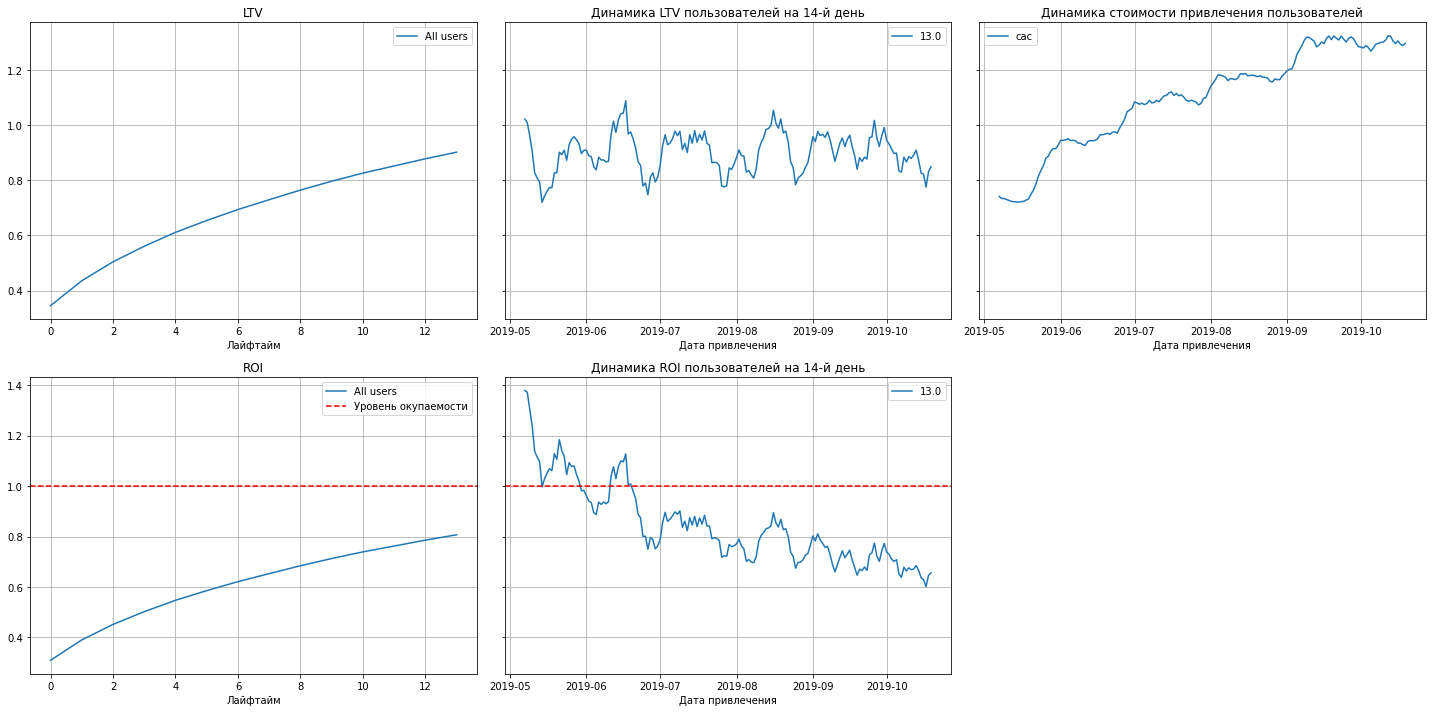

In [36]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7)

**Вывод:**

На графике LTV можно отметить, что показатели растут с первого дня привлечения клиента, однако если мы посмотрим на график ROI, то мы убедимся, что реклама не окупается в течение 14 дней, значит результаты не соответствуют ожиданиям, заложенным в бизнес-плане.

На графике динамики стоимости привлечения пользователей (САС) показано, что затраты на рекламу растут, начиная с июня 2019. Самый большой рост на графике - май 2019 - июнь 2019.

#### Нахождение конверсии пользователей и их удержания 

***Расчет конверсии пользователей и построение графика конверсии:***

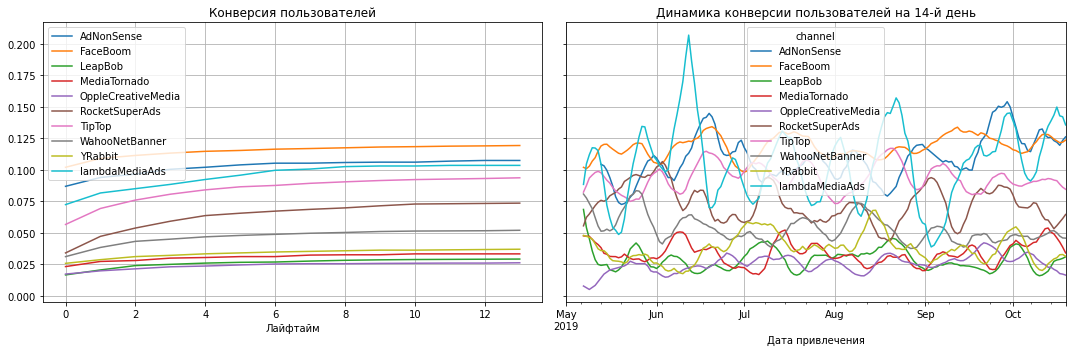

In [37]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions = ['channel']
)

plot_conversion(conversion_grouped, filter_data(conversion_history, 7), horizon_days)

***Расчет коэффициента удержания пользователей (Retention Rate) и построение графика удержания:***

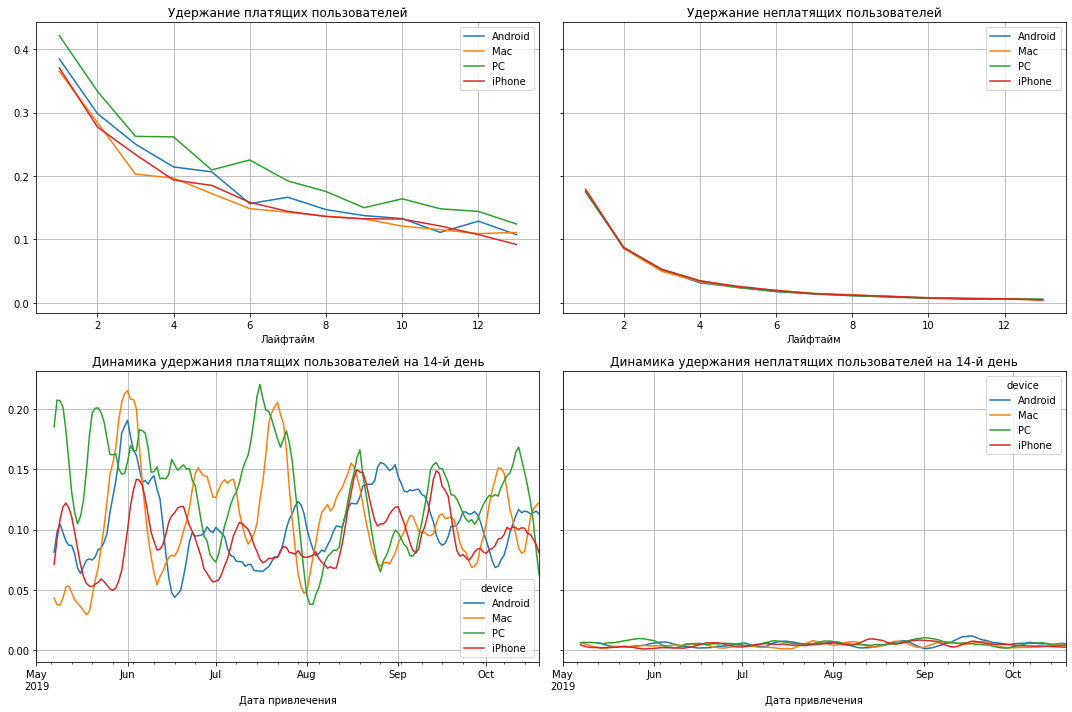

In [38]:
retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, horizon_days, dimensions=['device'])
plot_retention(retention_grouped, filter_data(retention_history, 7), horizon_days)

**Вывод:**

График конверсии с каждым днем растет, значит в исследовании нет ошибок.

По графику удержания можно понять, что с каждым днем коэффициент удержания уменьшается (нормальное состояние для Retention Rate). Коэффициент удержания платящих пользователей превышает коэффициент неплатящих пользователей. С помощью графика динамики удержания платящих пользователей можно сказать, что сначала показатель у клиентов, которые пользуется PC был больше, однако с июля месяца показатели для всех устройств не сильно отличаются друг от друга.

Коэффициент удержания неплатящих пользователей ближе к 14 дню после привлечения клиентов стремится к нулю.

#### Анализ окупаемости с разбивкой по устройствам

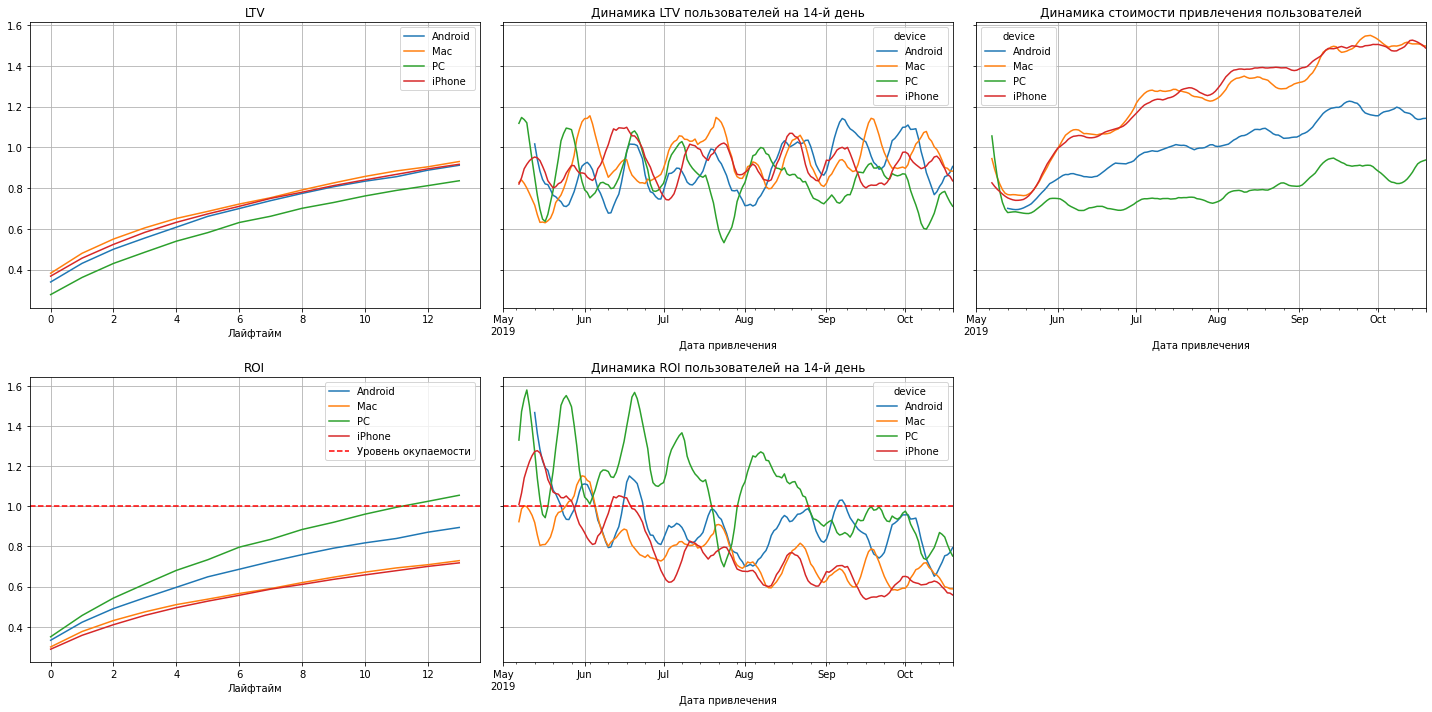

In [39]:
ltv_raw_d, ltv_grouped_d, ltv_history_d, roi_grouped_d, roi_history_d = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=['device'])
plot_ltv_roi(ltv_grouped_d, filter_data(ltv_history_d, 7), roi_grouped_d, filter_data(roi_history_d, 7), horizon_days, window=7)

**Вывод:**

На графике LTV можно отметить, что показатели растут для всех устройств, однако пользователи PC немного уступают. 

С помощью графика ROI мы можем сделать вывод, что на в среднем на седьмой день реклама для PC пользователей окупается. На 10-11 день она окупается для пользователей с Android устройствами.

На основе показателей графика динамики ROI на 14-й день в мае и июне окупаются все клиенты, которые были привлечены, однако с июля эти показатели ухудшаются, а в октябре прибыли практически нет на всех устройствах. 

Мы можем отметить, что стоимость привлечения клиентов растет с июня, а значит, что компания тратит больше средств на рекламу, но прибыль не увеличивается, так как график ROI постепенно падает.

#### Анализ окупаемости с разбивкой по странам

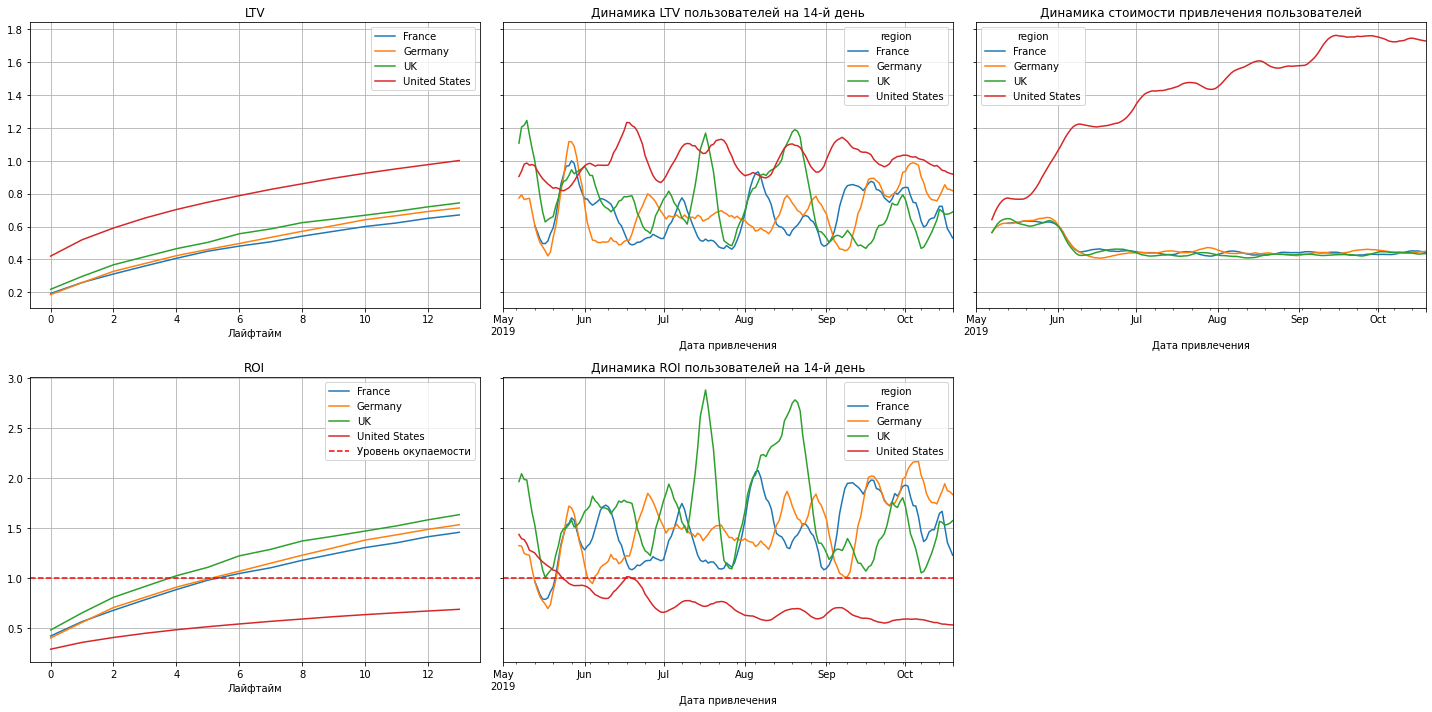

In [40]:
ltv_raw_r, ltv_grouped_r, ltv_history_r, roi_grouped_r, roi_history_r = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=['region'])
plot_ltv_roi(ltv_grouped_r, filter_data(ltv_history_r, 7), roi_grouped_r, filter_data(roi_history_r, 7), horizon_days, window=7)

**Вывод:**

С помощью графика LTV мы можем сделать вывод, что клиенты из США приносят больше прибыли, однако на графике ROI показатель для этой страны не преодолевает уровень окупаемости. На графике динамики стоимости привлечения пользователей мы наблюдаем, что компания тратит на рекламу пользователей из США в несколько раз больше, чем в других странах. Мы можем сделать вывод, что реклама для клиентов из США является неприбыльной для компании.

В среднем через 3 дня реклама окупается во Франции, Германии и Великобритании. Это отличный показатель, на которой стоит обратить внимание.

#### Анализ окупаемости с разбивкой по рекламным каналам

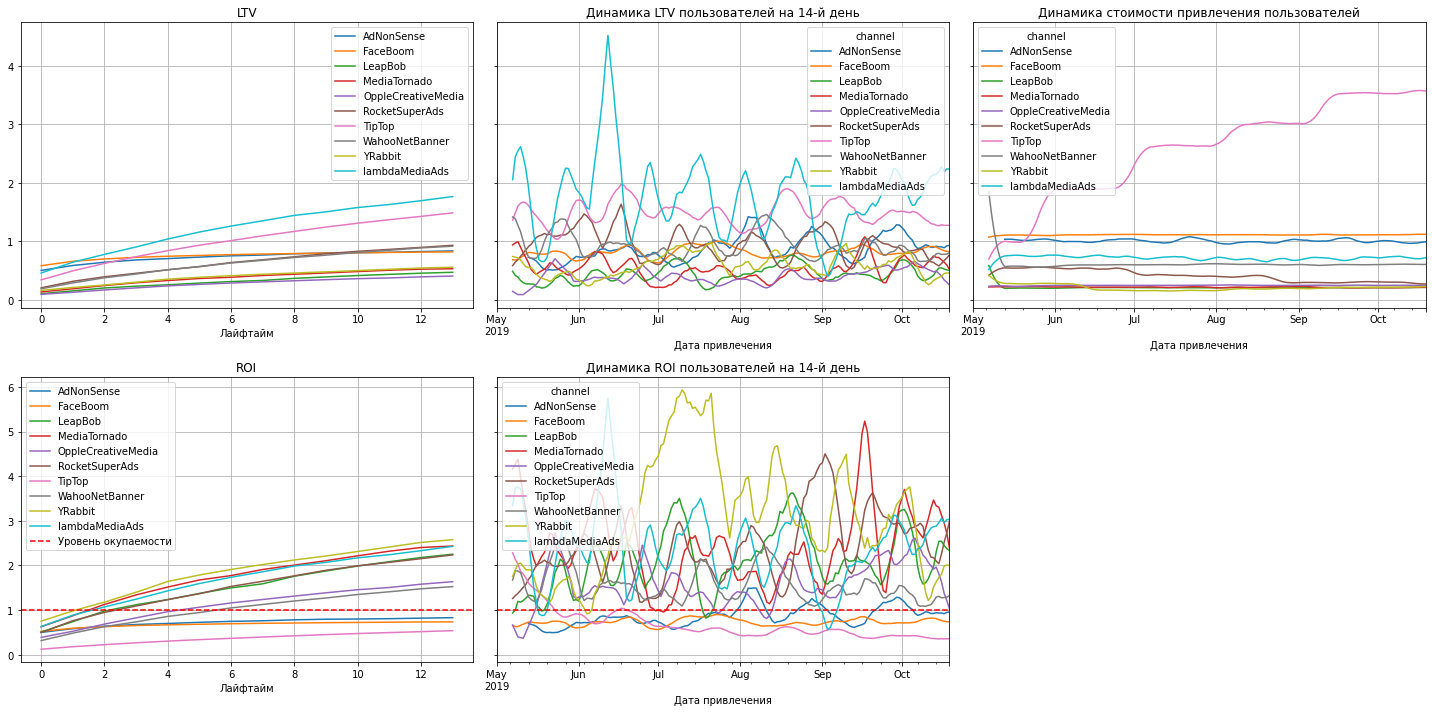

In [41]:
ltv_raw_c, ltv_grouped_c, ltv_history_c, roi_grouped_c, roi_history_c = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=['channel'])
plot_ltv_roi(ltv_grouped_c, filter_data(ltv_history_c, 7), roi_grouped_c, filter_data(roi_history_c, 7), horizon_days, window=7)

**Анализ конверсии и удержания пользователей, привлеченных с канала TipTop**

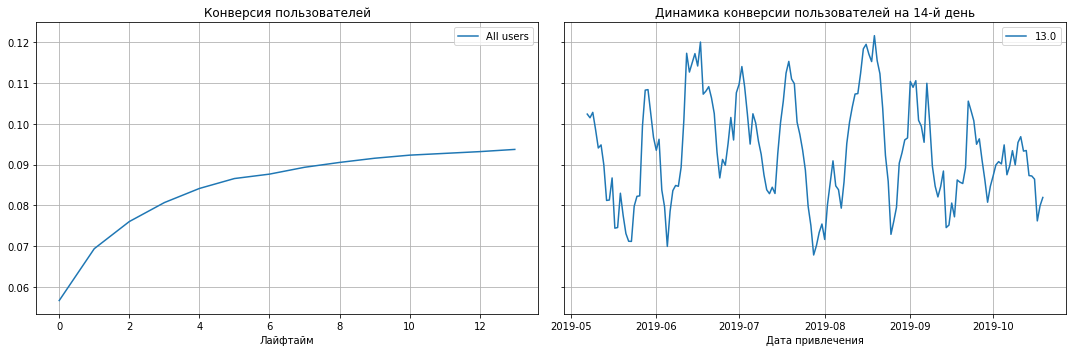

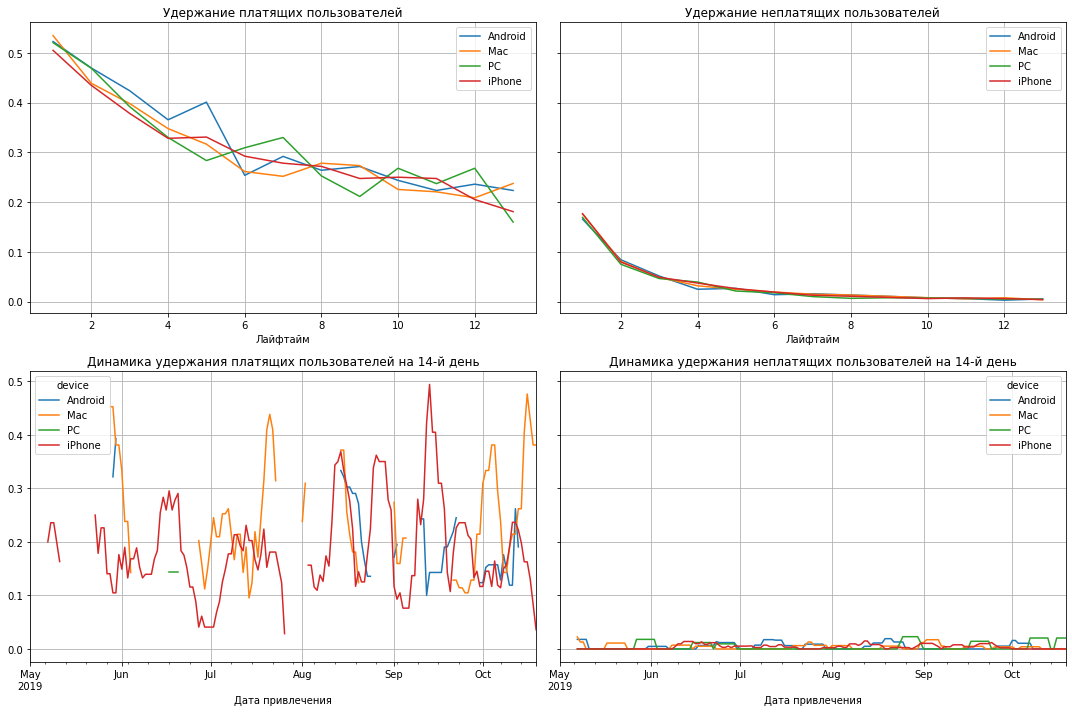

In [42]:
tiptop_users = profiles.query('channel == "TipTop"')
tiptop_visits = visits.query('channel == "TipTop"')

idshniki_tt = list(tiptop_users['user_id'].unique())
orders_tt = orders.query('user_id in @idshniki_tt')

conversion_raw_tt, conversion_grouped_tt, conversion_history_tt = get_conversion(
    tiptop_users, orders_tt, observation_date, horizon_days
)
plot_conversion(conversion_grouped_tt, conversion_history_tt, horizon_days)

retention_raw_tt, retention_grouped_tt, retention_history_tt = get_retention(tiptop_users, tiptop_visits, observation_date, horizon_days, dimensions=['device'])
plot_retention(retention_grouped_tt, retention_history_tt, horizon_days)

**Наблюдения:**

Стоит отметить, что график конверсии растет, коэффициент удержание неплатящих пользователей со второго дня близится к нулю. К 14 дню практически не остается неплатящих пользователей, а коэффициент удержания платящих пользователей стремится к 0.2

**Анализ конверсии и удержания пользователей, привлеченных с канала FaceBoom**

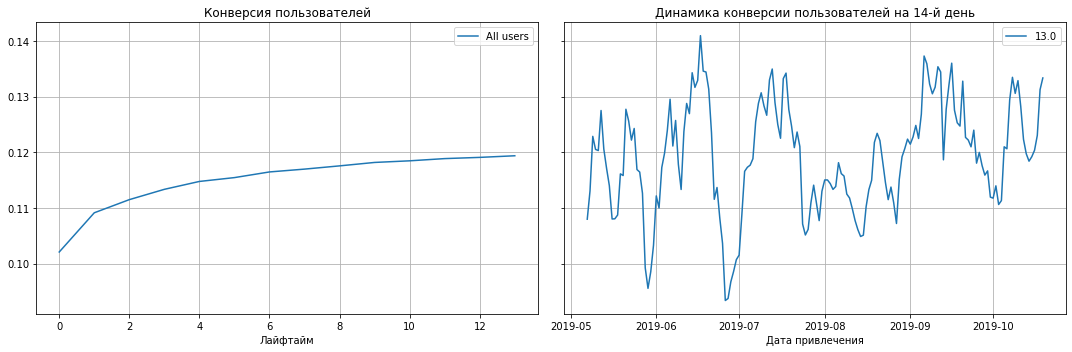

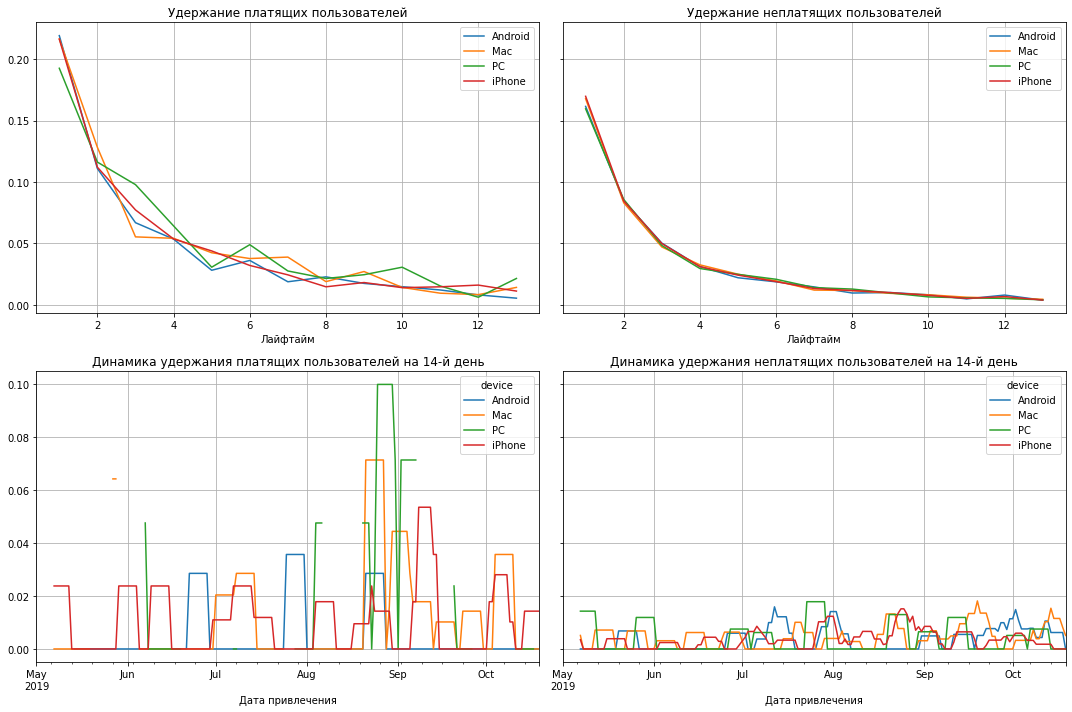

In [43]:
faceboom_users = profiles.query('channel == "FaceBoom"')
faceboom_visits = visits.query('channel == "FaceBoom"')

idshniki_fb = list(faceboom_users['user_id'].unique())
orders_fb = orders.query('user_id in @idshniki_fb')

conversion_raw_fb, conversion_grouped_fb, conversion_history_fb = get_conversion(
    faceboom_users, orders_fb, observation_date, horizon_days
)
plot_conversion(conversion_grouped_fb, conversion_history_fb, horizon_days)

retention_raw_fb, retention_grouped_fb, retention_history_fb = get_retention(faceboom_users, faceboom_visits, observation_date, horizon_days, dimensions=['device'])
plot_retention(retention_grouped_fb, retention_history_fb, horizon_days)

**Наблюдения:**

Конверсия пользователей, привлеченных с канала FaceBoom, с первого дня оказалась больше чем конверсия пользователей с канала TipTop. Это хороший показатель, однако на графиках динамики удержания мы можем увидить, что приложение не может долго удерживать платящих и неплатящих пользователей, поэтому с 8-го дня коэффициент удержания становится близким к нулю.

**Вывод:**

На графике ROI видно, что источники AdNonSense, FaceBoom и TipTop не окупаются за 12 дней. Реклама в канале AdNonSense окупится лишь трижды, как показано на графике динамики ROI пользователей на 14-й день. Также можно отметить, что стоимость привлечения клиентов в TipTop является наибольшей, значит реклама в этом канале наименее прибыльная, как показано на графике ROI. Клиенты, привлеченные с канала FaceBoom, не задерживаются в приложении, однако конверсия пользователей с FaceBoom является наибольшей среди всех каналов.

#### Вывод:

После проведенной оценки окупаемости рекламы мы можем сделать вывод, что есть страны, рекламные каналы и устройства, которые приносят только убытки для компании. В большинстве случаев реклама окупается за 14 дней.

Окупается ли реклама, направленная на привлечение пользователей в целом?

- Реклама не окупается, так как общий ROI не превышает единицу, а значит, что компания терпит убытки. Затраты на рекламу превышают прибыль.

Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?

- Устройства: Негативное влияние на окупаемость рекламы могут оказывать пользователи, которые пользуются приложением с Mac и iPhone, так как показатели окупаемости на этих устройствах уступают показателям для других устройств.

- Страны: Затраты на рекламу для привлечения клиентов из США превышают затраты в других странах. Инвестиции для этого региона не окупаются, значит пользователи из США не приносяь прибыли компании.

- Рекламные каналы: FaceBoom и TipTop являются самыми затратными источниками для привлечения пользователей. TipTop является каналом с дорогой рекламой, на которую компания тратит много денег. Канал FaceBoom приводит клиентов, которые быстро уходят.

Чем могут быть вызваны проблемы окупаемости?

- Для пользователей с устройствами от компании Apple проблемы с окупаемостью могут быть вызваны проблемами в работе приложения. Продукт может быть менее оптимизирован для устройств с операционными системами macOS и iOS. Также есть вероятность, что такие пользователи сталкиваются с проблемами при оплате.

- Для клиентов из США проблема с окупаемостью может быть вызвана тем, что компания тратит слишком много на привлечение таких пользователей, поэтому прибыль не превышает затраты.

- Для клиентов, переходящих из рекламных источников FaceBoom и TipTop проблемы с окупаемостью могут быть вызваны тем, что в TipTop реклама требует значительно больших вложений, чем в других каналах. Для канала FaceBoom ситуация иная: затраты компании стабильны, прибыль стабильно мала, поэтому клиенты приносят убытки для компании.

### Общий вывод

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

В работе были изучены исходные данные о маркетинге компании в период с 1 мая по 27 октября 2019 года. В данных были исправлены типы данных столбцов, были переименованы столбцы и приведены к змеиному регистру. На основе обработанных данных было проведено исследование: составлены профили пользователей из разных регионов, посчитаны бизнес-показатели (LTV, ROI, CAC, Retention Rate, конверсия пользователей). Была посчитана общая сумма расходов на маркетинг, затраты были распределены для каждого источника, обнаружены клиенты, которые приносят убытки для компании.

В конце каждого этапа написаны выводы, с которыми можно ознакомиться.

Важные результаты, на основе которых можно изменить бизнес-план, чтобы компания перестала терпеть убытки:

- Негативное влияние на окупаемость рекламы оказывают пользователей, которые пользуются приложением с устройств Mac и iPhone.
- Американские клиенты приносят меньше всего прибыли, так как затраты на их привлечение во много раз больше, чем затраты на клиентов из других стран.
- Рекламные источники FaceBoom и TipTop являются наименее прибыльными для компании.

Причины неэффективности привлечения пользователей:

1. Компания тратит слишком много денежных средств на некоторые рекламные каналы, клиенты которых в дальнейшем не приносят значительной прибыли. Компания может терять все деньги, заработанные на клиентах из других источников.
2. Исследование показало, что пользователи техники Apple приносят меньше прибыли, чем клиенты, которые используют PC и Android. Компания теряет деньги, привлекая клиентов из этой категории.
3. На основе полученных результатов мы выяснили, что реклама для привлечения клиентов из США не приносит прибыли, чтобы окупить огромные затраты на рекламную кампанию.

Рекомендации для отдела маркетинга:

Чтобы избежать дальнейших убытков, необходимо пересмотреть инвестиции в рынок США, потому что окупаемость рекламы для клиентов из этого региона является наименьшей. В среднем один клиент из США тратит больше денег в приложении, однако стоимость привлечения в несколько раз выше. Можно попробовать найти способ, как уменьшить затраты на рекламу, так как американский рынок выгоден, но при меньших вложениях в рекламу.

Следует оптимизировать приложение для пользователей техники Apple, узнать, с какими проблемами они сталкиваются. Например, это могут быть проблемы в работе приложения или проблемы при оплате внутри приложения.

Необходимо минимизировать затраты на рекламный канал TipTop, так как он требует большого количества вложений в рекламу, но не приносит значительной прибыли.

Советую изучить ситуацию с клиентами, которые были привлечены с канала FaceBoom. Конверсия таких пользователей является наибольшей среди всех каналов, однако клиенты быстро уходят. Мы можем их заинтересовать, предложив определенные условия, но без вреда для клиентов с других каналов, так как мы можем потерять их доверие. Еще можно повысить удержание для пользователей из США, например с помощью введения персонализированных UX-стратегий, e-mail рассылок, персональных рекомендаций, push-уведомлений. Можно ввести определённые "награды" или привилегии для постоянных пользователей. Для канала FaceBoom можно настроить более таргетированное привлечение, направленное на пользователей с необходимыми характеристиками. Также, можно ввести поощрение пользователей за репосты контента и прочий социальный engagement, связанный с приложением, в данном канале.